<a href="https://colab.research.google.com/github/tamburins/ESAA_2023/blob/main/%E1%84%86%E1%85%A9%E1%84%83%E1%85%A6%E1%86%AF%E1%84%92%E1%85%AE%E1%86%AB%E1%84%85%E1%85%A7%E1%86%AB_%E1%84%8B%E1%85%A7%E1%86%AB%E1%84%89%E1%85%B3%E1%86%B8%E1%84%86%E1%85%AE%E1%86%AB%E1%84%8C%E1%85%A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **| 모델 훈련 연습 문제**
___
- 출처 : 핸즈온 머신러닝 Ch04 연습문제 1, 5, 9, 10
- 개념 문제의 경우 텍스트 셀을 추가하여 정답을 적어주세요.

### **1. 수백만 개의 특성을 가진 훈련 세트에서는 어떤 선형 회귀 알고리즘을 사용할 수 있을까요?**
___


확률적 경사하강법(SGD), 미니배치 경사하강법, 훈련세트 크기가 메모리에 맞다면 배치경사 하강법도 사용 가능하다.

### **2. 배치 경사 하강법을 사용하고 에포크마다 검증 오차를 그래프로 나타내봤습니다. 검증 오차가 일정하게 상승되고 있다면 어떤 일이 일어나고 있는 걸까요? 이 문제를 어떻게 해결할 수 있나요?**
___

학습률이 너무 높고 알고리즘이 발산하고 있을 가능성이 높은데 이는 과대적합의 가능성을 포함한다. 검증 에러가 최솟값에 도달했을 때 학습을 조기종료 하여 해결할 수 있다.

### **3. 릿지 회귀를 사용했을 때 훈련 오차가 검증 오차가 거의 비슷하고 둘 다 높았습니다. 이 모델에는 높은 편향이 문제인가요, 아니면 높은 분산이 문제인가요? 규제 하이퍼파라미터 $\alpha$를 증가시켜야 할까요 아니면 줄여야 할까요?**
___

모델이 훈련세트에 과소적합된 문제로 높은 편향이 문제이다. 따라서 규제하이퍼 파라미터 alpha를 감소시켜야 한다. 알파를 낮춰야 편향이 떨어지고 분산이 증가한다.

### **4. 다음과 같이 사용해야 하는 이유는?**
___
- 평범한 선형 회귀(즉, 아무런 규제가 없는 모델) 대신 릿지 회귀
> 규제가 있는 모델이 없는 모델에 비해 성능이 좋으므로 규제가 없는 선형회귀보다 일반적으로 규제가 존재하는 릿지회귀를 많이 사용한다.

- 릿지 회귀 대신 라쏘 회귀
> 라쏘회귀는 페널티를 사용하여 가장 중요한 가중치를 제외하고는 완전히 0으로 만든다. 몇개의 특성만 유용할 것이라고 의심이 될 때 희소한 모델을 만들 수 있기 때문이다. 

- 라쏘 회귀 대신 엘라스틱넷
> 몇개의 특성이 강하게 연관되어 있거나 특성 수가 훈련 샘플보다 많을 때 라쏘가 불규칙적으로 행동하여 엘라스틱넷이 더 사용된다. 

### **5. 조기 종료를 사용한 배치 경사 하강법으로 소프트맥스 회귀를 구현해보세요(사이킷런은 사용하지 마세요)**


---



In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris['target']

In [30]:
# Add Bias
X_with_bias = np.c_[np.ones([len(X),1]),X]   
# len(X) 개수 만큼 1로 채워진 [ ], [ ]......[ ] array
# 2열 -> 3열로 늘어남
np.random.seed(2023)

In [31]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)    # 150을 무작위로 섞음 

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]  # test_size 만큼 남겨둠
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]   
y_test = y[rnd_indices[-test_size:]]

In [32]:
def to_one_hot(y):
    n_classes = y.max()+1    # 0,1,2 라 max=2 / +1 하면 classes 개수
    m = len(y)                     # 총 150개의 라벨들
    y_one_hot = np.zeros((m,n_classes))
    y_one_hot[np.arange(m),y] = 1   # index의 행중에 y값을 1로 치환
    return y_one_hot

In [33]:
y_train[:10]

array([2, 1, 1, 2, 1, 2, 1, 1, 0, 1])

In [34]:
to_one_hot(y_train[:10])

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [35]:
# 라벨 전부를 onehot encoding하기
y_train_one_hot = to_one_hot(y_train)
y_valid_one_hot = to_one_hot(y_valid)
y_test_one_hot = to_one_hot(y_test)


In [36]:
# Softmax 함수 만들기

def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps,axis=1,keepdims=True)   # axis=1   ->  가장 안쪽의 [ ] 안의 성분의 합 / 각 exps들의 합
    return exps/exp_sums

In [37]:
# 입력과 출력의 갯수 정하기
n_inputs = X_train.shape[1]   # (90,3) 인데 1로 인덱싱 ==3
n_outputs = len(np.unique(y_train))  # y_train값을 중복되지 않는 값들을 출력  3

#### 훈련

In [38]:
eta = 0.01
n_iteration = 5001
m = len(X_train)
epsilon = 1e-7 # ε : 입실론     nan값을 피하기 위해 logPi에 추가.

Theta = np.random.randn(n_inputs,n_outputs)

for i in range(n_iteration):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - y_train_one_hot
    if i % 500 == 0:
        print(i,loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 4.790018784484257
500 0.785020736900716
1000 0.6616653889113486
1500 0.586314050008023
2000 0.5348597711112729
2500 0.49688006735424745
3000 0.46727412507861504
3500 0.4432662552976047
4000 0.42321424956900444
4500 0.4060806681092987
5000 0.39117512318999975


In [39]:
Theta

array([[ 2.9692039 , -1.07261717, -2.95032761],
       [-0.88858201,  0.45641065, -0.02099529],
       [-1.68207454, -0.7274543 ,  1.74524225]])

In [40]:
# 검증 세트에 대한 정확도 확인 
logits = X_valid.dot(Theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy = np.mean(y_predict == y_valid)
accuracy
# 모델이 매우 잘 작동하는 것으로 확인됨
# L2규제를 추가해보자

0.9

In [41]:
eta = 0.1
n_iteration = 5001
m = len(X_train)
epilson = 1e-7
alpha = 0.1  # 규제 파라미터 

Theta = np.random.randn(n_inputs,n_outputs)

for i in range(n_iteration):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    entropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = entropy_loss + alpha * l2_loss
    error = Y_proba - y_train_one_hot
    if i % 500 == 0:
        print(i,loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1,n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients


0 4.043121400580127
500 0.5457758038857797
1000 0.5169218799610324
1500 0.5082656626820109
2000 0.5050713602984982
2500 0.5037979907060681
3000 0.503269895930289
3500 0.5030458392081054
4000 0.5029494502807158
4500 0.502907620608342
5000 0.5028893660606176


In [42]:
# l2 패널티 때문에 손실이 더 커보인다. 모델이 더 잘 작동하는지 확인해보자
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba,axis=1)

acc = np.mean(y_predict == y_valid)
acc
# 더 성능이 좋은 모델이 되었다.

0.9333333333333333

In [43]:
# 조기 종료 추가
eta = 0.1
m = len(X_train)
iteration= 5001
epsilon = 1e-7
alpha = 0.1
best_loss = np.infty

Theta = np.random.randn(n_inputs,n_outputs)

for i in range(iteration):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    entropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = entropy_loss + alpha * l2_loss
    error = Y_proba - y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[(np.zeros([1,n_outputs]),alpha * Theta[1:])]
    Theta = Theta - eta * gradients
    
    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(i,loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(i-1, best_loss)
        print(i,loss,"Early Stopping!")
        break

4028 0.48247168730945433
4029 0.48247168733637924 Early Stopping!


In [44]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51086 (\N{HANGUL SYLLABLE IP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


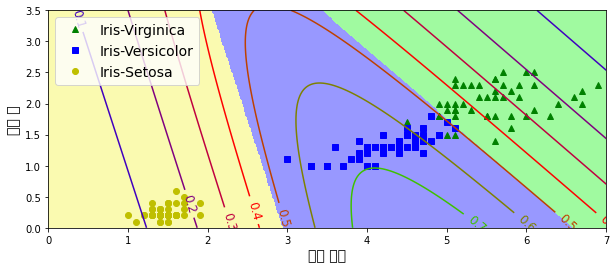

In [45]:
# 한글출력
import matplotlib
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 폭", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [46]:
# 최종 테스트 데이터 예측 
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

# 매우 정확한 예측도를 보였다

0.9666666666666667